**MODULE-1** : **DATA IMPORTING**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**MODULE-2** : **DATA PREPROCESSING(SINGLE IMAGE)**

 **Read image**

In [ ]:
from skimage.io import imread
from skimage import color
import matplotlib.pyplot as plt

fig0 , ax0 = plt.subplots()

fig0.set_size_inches(20, 20)

image=imread('/content/drive/MyDrive/MAJOR PROJECT 2024/ARSP Group15-MAJOR PROJECT-DCVD-ECG IMAGES/Normal Person ECG Images (284x12=3408)/Normal(1).jpg')

ax0.imshow(image)
plt.show()

Output hidden; open in https://colab.research.google.com to view.

##Converting to Gray Scale (SINGLE IMAGE)

In [ ]:
#Converting to Gray Scale
import cv2
fig0 , ax0 = plt.subplots()
# Load the image
image = cv2.imread('/content/drive/MyDrive/MAJOR PROJECT 2024/ARSP Group15-MAJOR PROJECT-DCVD-ECG IMAGES/Normal Person ECG Images (284x12=3408)/Normal(1).jpg')

# Convert the image to grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Save the grayscale image
cv2.imwrite('output_gray_image.jpg', gray_image)
fig0.set_size_inches(20, 20)
ax0.imshow(image)
plt.show()

Output hidden; open in https://colab.research.google.com to view.

#### **DIVIDING AN ECG INTO SEPERATE LEADS(13) FOR PROCESSING**

A 12-lead ECG is made up of a tracing of the electrical activity of the heart from 12
different points of view. The point of view comes from the location of the positive
electrode of each lead. The positioning of these electrodes is broken down into 3
categories, the limb leads (lead I, II & III), the augmented leads (aVR, aVL & aVF) and
the precordial or chest leads (V1, V2, V3, V4, V5 & V6)

In [ ]:
#dividing the ECG leads from 1-13 from the above image
Lead_1 = image[300:600, 150:643]
Lead_2 = image[300:600, 646:1135]
Lead_3 = image[300:600, 1140:1625]
Lead_4 = image[300:600, 1630:2125]
Lead_5 = image[600:900, 150:643]
Lead_6 = image[600:900, 646:1135]
Lead_7 = image[600:900, 1140:1625]
Lead_8 = image[600:900, 1630:2125]
Lead_9 = image[900:1200, 150:643]
Lead_10 = image[900:1200, 646:1135]
Lead_11 = image[900:1200, 1140:1625]
Lead_12 = image[900:1200, 1630:2125]
Lead_13 = image[1250:1480, 150:2125]

Leads=[Lead_1,Lead_2,Lead_3,Lead_4,Lead_5,Lead_6,Lead_7,Lead_8,Lead_9,Lead_10,Lead_11,Lead_12,Lead_13]

##Plotting leads 1-12

In [ ]:
from skimage.segmentation import slic
from skimage.color import label2rgb

#plotting lead 1-12
fig , ax = plt.subplots(4,3)

fig.set_size_inches(20, 20)

x_counter=0
y_counter=0


for x,y in enumerate(Leads[:len(Leads)-1]):
  if (x+1)%3==0:
    ax[x_counter][y_counter].imshow(y)
    ax[x_counter][y_counter].axis('off')
    ax[x_counter][y_counter].set_title("Leads {}".format(x+1))
    x_counter+=1
    y_counter=0
  else:
    ax[x_counter][y_counter].imshow(y)
    ax[x_counter][y_counter].axis('off')
    ax[x_counter][y_counter].set_title("Leads {}".format(x+1))
    y_counter+=1

#plot the image
plt.show()

Output hidden; open in https://colab.research.google.com to view.

##Plotting lead 13

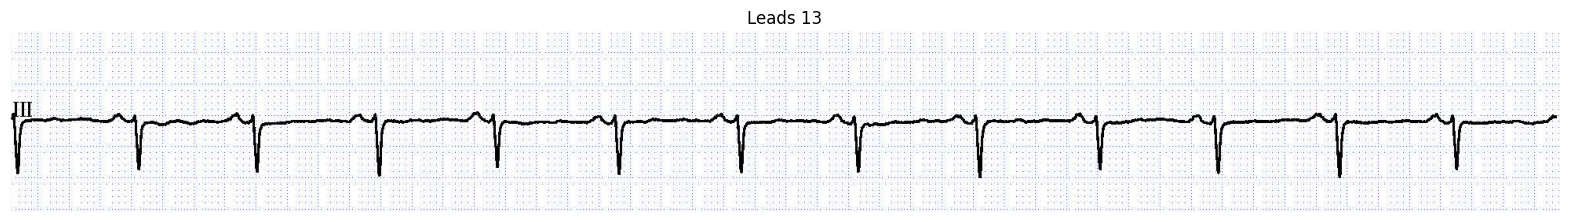

In [ ]:
#plotting lead 13
fig1 , ax1 = plt.subplots()
fig1.set_size_inches(20, 20)

ax1.imshow(Lead_13)
ax1.set_title("Leads 13")
ax1.axis('off')
plt.show()

#### **TRANSFORMAING ECG IMAGES** : GAUSSIAN FILTERING, THRESHOLDING,  BINARIZATION

# showing the Image with **gaussian filter**

A Gaussian filter is a type of smoothing filter that is commonly used in image processing and computer vision. It works by applying a convolution operation to the image data with a kernel that approximates a Gaussian distribution. This means that pixels further away from the centre of the kernel are weighted less than those closer to the centre. The result of this operation is a smoother, more blurred version of the original image. Gaussian filter can help in edge detection by higlighting the boundries of objects within an image.

Mahotas is a computer vision and image processing library for Python. It provides a wide range of functions for image processing tasks such as filtering, feature detection, segmentation, and more. Mahotas is particularly known for its speed and efficiency, making it a popular choice for handling large image datasets.

In [ ]:
! pip install mahotas

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.4/5.4 MB 21.9 MB/s eta 0:00:00


Image with filter


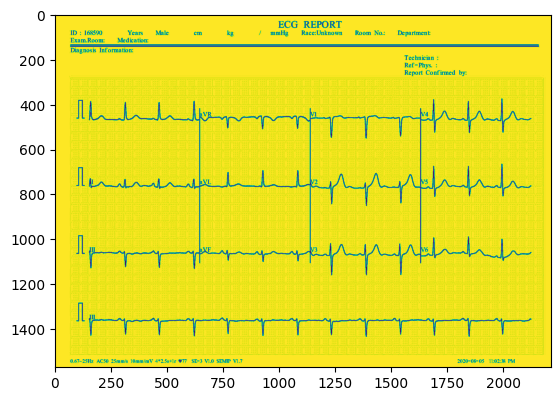

Image with gaussian filter


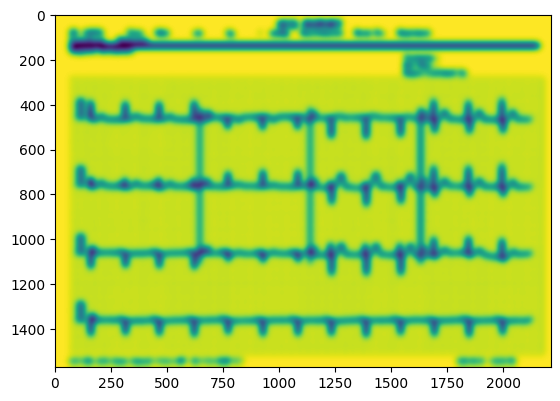

In [ ]:

# importing required libraries
import numpy as np
import mahotas
from pylab import imshow, show

# loading image
img = mahotas.imread('/content/drive/MyDrive/MAJOR PROJECT 2024/ARSP Group15-MAJOR PROJECT-DCVD-ECG IMAGES/Normal Person ECG Images (284x12=3408)/Normal(1).jpg')

# filtering the image
img = img[:, :, 0]

print("Image with filter")
# showing the image
imshow(img)
show()


# setting gaussian filter
gaussian = mahotas.gaussian_filter(img, 15)

print("Image with gaussian filter")
# showing the gaussian filter
imshow(gaussian)
show()

# **Binarize** the image based on the **threshold value**

Thresholding is the technique of generating a binary image (a binary image is one whose pixels have only two values – 0 and 1 and thus require only one bit to store pixel intensity) from a given greyscale image by separating it into two regions based on a threshold value. Hence pixels having intensity values greater than the said threshold value will be treated as white or 1 in the output image and the others will be black or 0.

Binarize the image using the threshold value. This means that all pixel intensity values **below 140.0 will be set to 0 (black)**, and all pixel values **equal to **or **greater than 140.0 will be set to 255 (white).**

Otsu's threshold value: 140.0


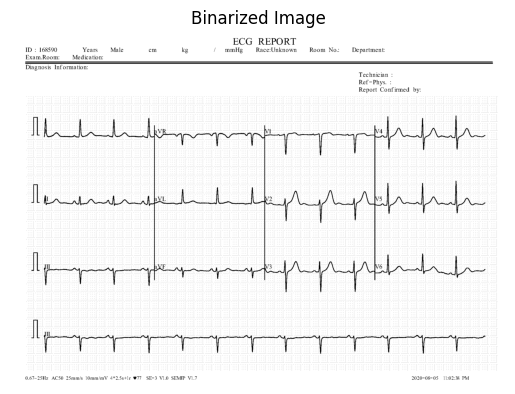

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Read image in grayscale mode
image_path = '/content/drive/MyDrive/MAJOR PROJECT 2024/ARSP Group15-MAJOR PROJECT-DCVD-ECG IMAGES/Normal Person ECG Images (284x12=3408)/Normal(1).jpg'
image = cv2.imread(image_path, 0)

# Check if the image was loaded properly
if image is not None:
    # Apply Otsu's thresholding
    ret_val, otsu_thresh_img = cv2.threshold(image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

    # Display the threshold value
    print(f"Otsu's threshold value: {ret_val}")

    # Binarize the image based on the threshold value
    binary_image = np.where(image > ret_val, 255, 0).astype(np.uint8)

    # Display the binarized image using Matplotlib
    plt.imshow(binary_image, cmap='gray')
    plt.title('Binarized Image')
    plt.axis('off')
    plt.show()
else:
    print("Image not found. Please check the file path.")

# **Plot the graph:** Split the **histogram** into two parts based on the **threshold value**

Otsu's threshold value: 140.0


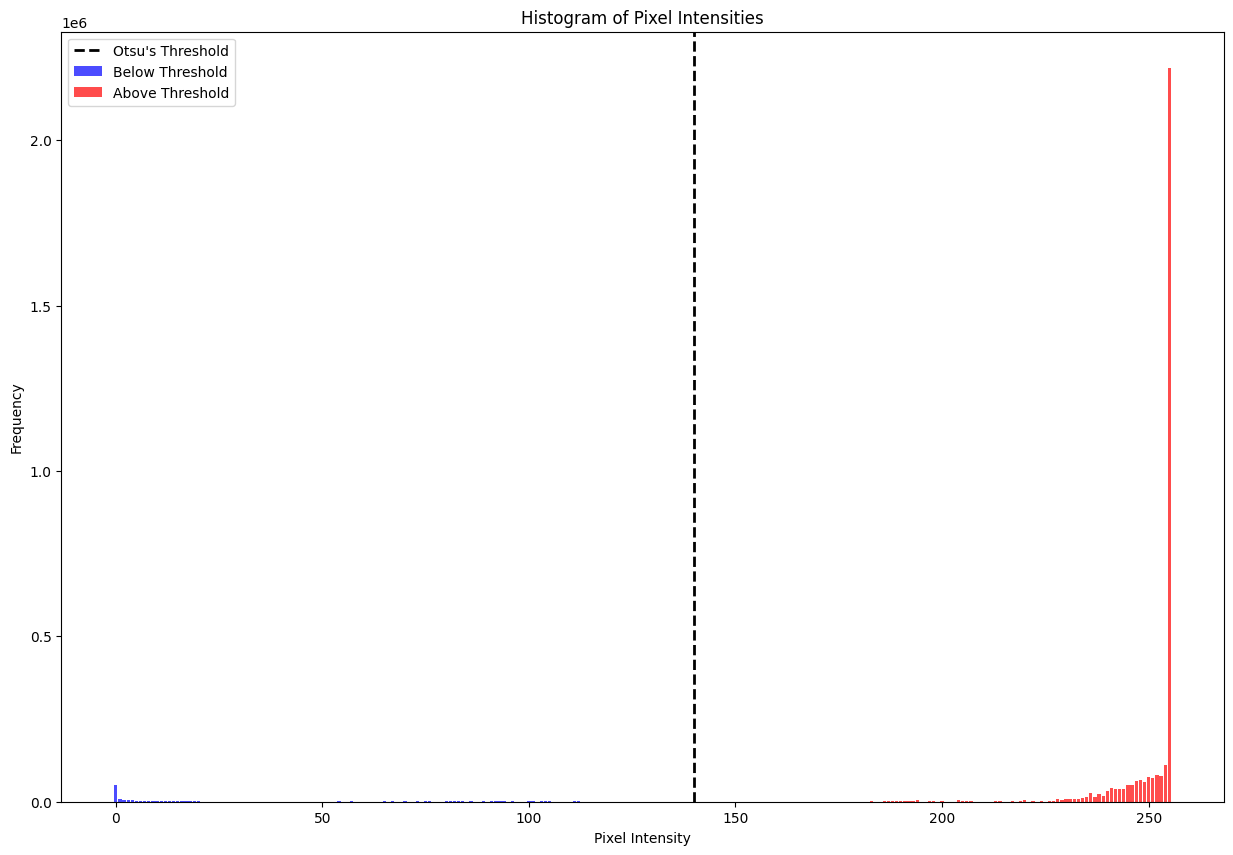

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Read image in grayscale mode
image_path = '/content/drive/MyDrive/MAJOR PROJECT 2024/ARSP Group15-MAJOR PROJECT-DCVD-ECG IMAGES/Normal Person ECG Images (284x12=3408)/Normal(1).jpg'
image = cv2.imread(image_path, 0)

# Check if the image was loaded properly
if image is not None:
    # Apply Otsu's thresholding
    ret_val, _ = cv2.threshold(image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

    # Display the threshold value
    print(f"Otsu's threshold value: {ret_val}")

    # Calculate the histogram of pixel intensities
    hist = cv2.calcHist([image], [0], None, [256], [0, 256])
    hist = hist.ravel()

    # Split the histogram into two parts based on the threshold value
    hist_below_thresh = hist[:int(ret_val)]
    hist_above_thresh = hist[int(ret_val):]

    # Plot the graph
    plt.figure(figsize=(15, 10))
    plt.bar(range(int(ret_val)), hist_below_thresh, color='blue', alpha=0.7, label='Below Threshold')
    plt.bar(range(int(ret_val), 256), hist_above_thresh, color='red', alpha=0.7, label='Above Threshold')
    plt.axvline(ret_val, color='black', linestyle='--', linewidth=2, label='Otsu\'s Threshold')
    plt.title('Histogram of Pixel Intensities')
    plt.xlabel('Pixel Intensity')
    plt.ylabel('Frequency')
    plt.legend()
    plt.show()
else:
    print("Image not found. Please check the file path.")

##Creating Binary Images based on threshold for lead 1-12 :Pre-Processed Image leads

#### **TRANSFORMAING ECG IMAGES: REMOVING GRIDLINES/ PERFROM



THRESHOLDING,  BINARIZATION, GAUSSIAN FILTERING**

The **Gaussian filter** is used for blurring or smoothing an image. It helps reduce noise and detail in an image, making it more suitable for subsequent processing steps.
**Otsu's method** is a **thresholding technique** used to automatically determine the optimal threshold value for image segmentation. It separates an image into foreground and background based on the intensity distribution.

Creating a binary image based on a threshold is a common image processing technique used to segment objects from the background. It involves converting a grayscale image into a binary image, where each pixel is assigned a value of 0 (black) or 1 (white), depending on whether its intensity is below or above a certain threshold value.

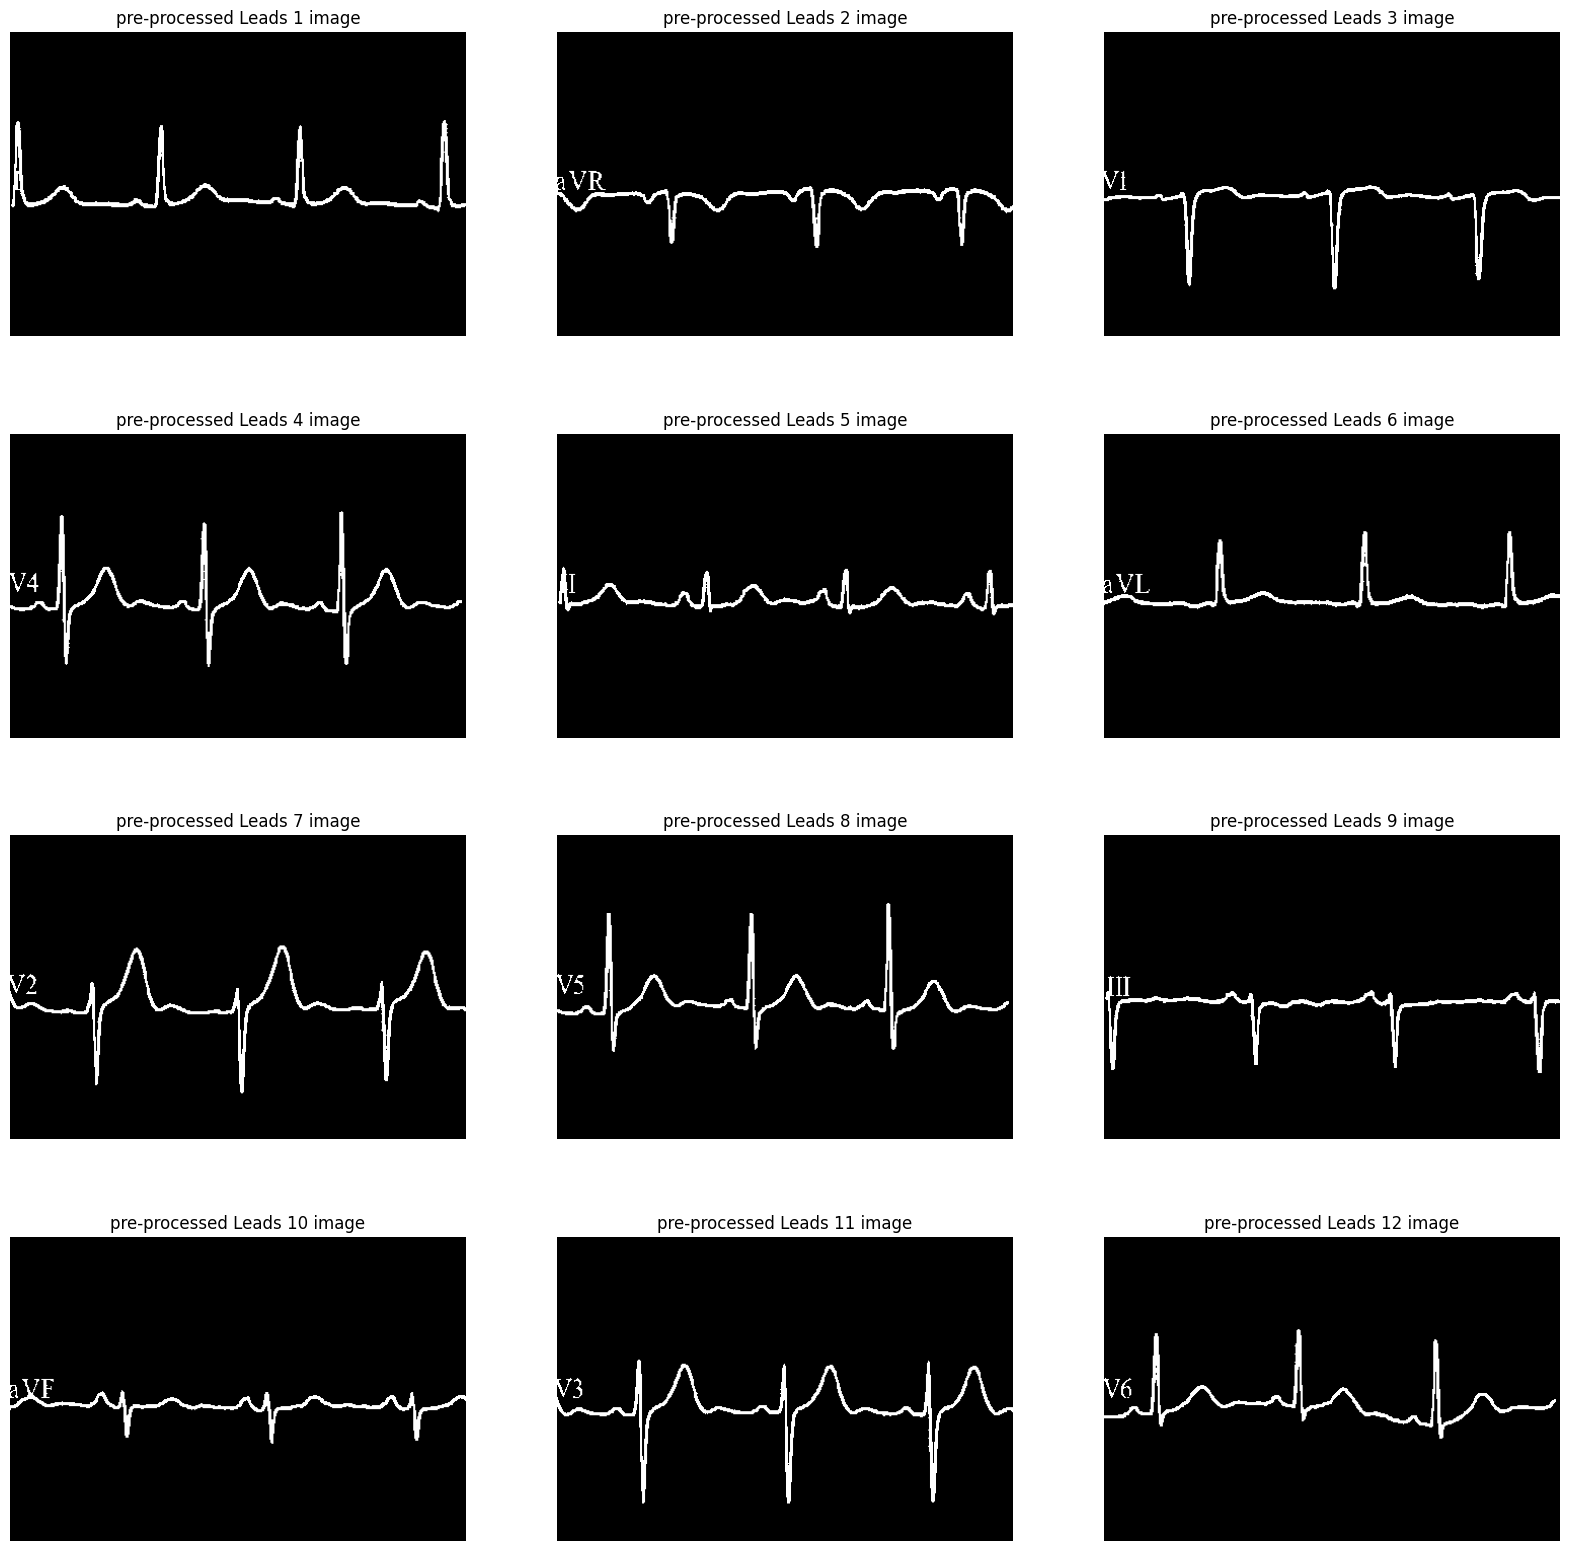

In [ ]:
#importing gaussian filter and otsu threshold
from skimage.filters import threshold_otsu,gaussian
from skimage.transform import resize
from numpy import asarray

#creating subplot of size(4,3) 4 rows and 3 columns
fig2 , ax2 = plt.subplots(4,3)

fig2.set_size_inches(20, 20)

#setting counter for plotting based on value
x_counter=0
y_counter=0

#looping through image list containg all leads from 1-12
for x,y in enumerate(Leads[:len(Leads)-1]):
  #converting to gray scale
  grayscale = color.rgb2gray(y)
  #smoothing image
  blurred_image = gaussian(grayscale, sigma=0.7)
  #thresholding to distinguish foreground and background
  #using otsu thresholding for getting threshold value
  global_thresh = threshold_otsu(blurred_image)

  #creating binary image based on threshold
  binary_global = blurred_image < global_thresh
  #resize image
  binary_global = resize(binary_global, (300, 450))

  if (x+1)%3==0:
    ax2[x_counter][y_counter].imshow(binary_global,cmap="gray")
    ax2[x_counter][y_counter].axis('off')
    ax2[x_counter][y_counter].set_title("pre-processed Leads {} image".format(x+1))
    x_counter+=1
    y_counter=0
  else:
    ax2[x_counter][y_counter].imshow(binary_global,cmap="gray")
    ax2[x_counter][y_counter].axis('off')
    ax2[x_counter][y_counter].set_title("pre-processed Leads {} image".format(x+1))
    y_counter+=1

#plot the image
plt.show()

##Creating Binary Image based on threshold for lead 13

0.5533634183853098


(-0.5, 1974.5, 229.5, -0.5)

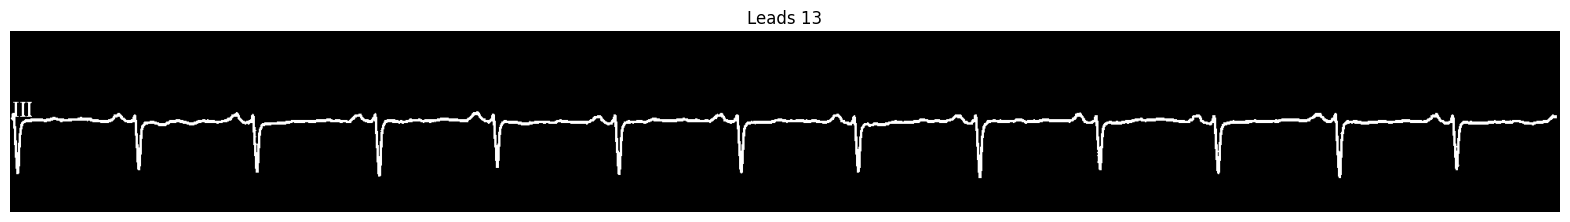

In [ ]:
#plotting lead 13
fig3 , ax3 = plt.subplots()
fig3.set_size_inches(20, 20)

#converting to gray scale
grayscale = color.rgb2gray(Lead_13)
#smoothing image
blurred_image = gaussian(grayscale, sigma=0.7)
#thresholding to distinguish foreground and background
#using otsu thresholding for getting threshold value
global_thresh = threshold_otsu(blurred_image)
print(global_thresh)

#creating binary image based on threshold
binary_global = blurred_image < global_thresh
ax3.imshow(binary_global,cmap='gray')
ax3.set_title("Leads 13")
ax3.axis('off')

## Creating Binary Image based on threshold for Lead 11 and Testing for Data Extraction

0.5529202420866972


(-0.5, 484.5, 299.5, -0.5)

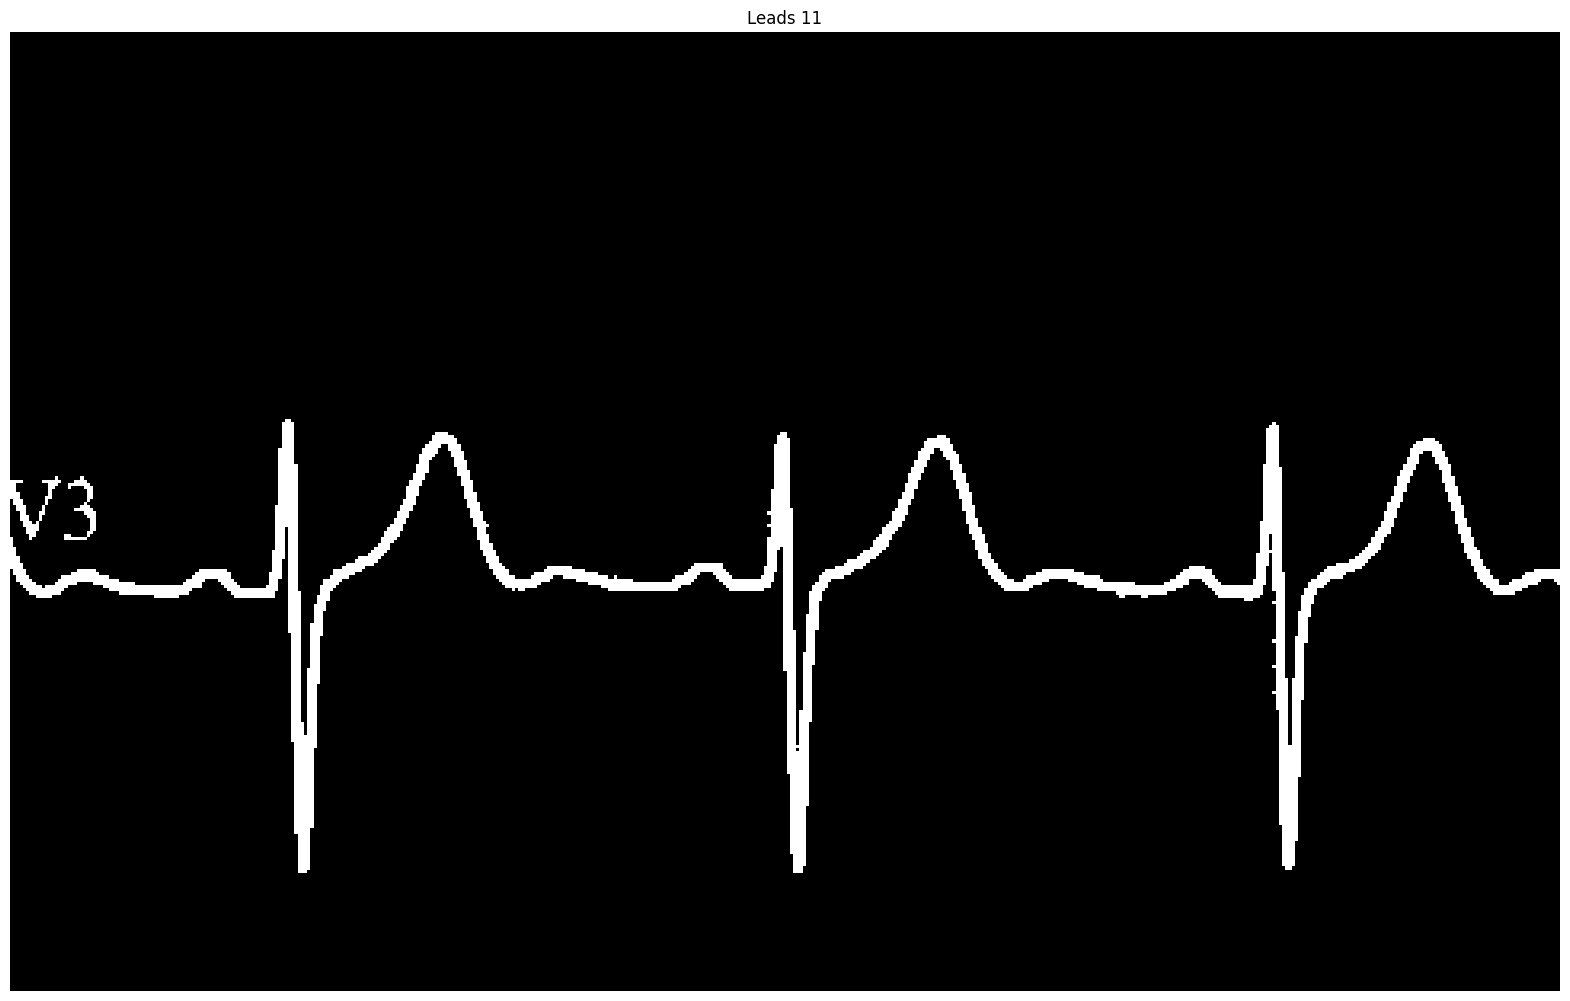

In [ ]:
#plotting lead 11
fig3 , ax3 = plt.subplots()
fig3.set_size_inches(20, 20)

#converting to gray scale
grayscale = color.rgb2gray(Lead_11)
#smoothing image
blurred_image = gaussian(grayscale, sigma=0.7)
#thresholding to distinguish foreground and background
#using otsu thresholding for getting threshold value
global_thresh = threshold_otsu(blurred_image)
print(global_thresh)

#creating binary image based on threshold
binary_global = blurred_image < global_thresh
ax3.imshow(binary_global,cmap='gray')
ax3.set_title("Leads 11")
ax3.axis('off')

##**MODULE-3** : FEATURE EXTRACTION/DATA EXTRACTION (SINGLE ECG IMAGE)

#### **PERFROM CONTOURS TO SEPERATE ONLY THE SIGNAL FROM IMAGE**

Contour detection is a technique that can help us identify the boundaries of objects in an image, and separate them from the background or other objects.

[(1474, 2)]


Text(0.5, 1.0, 'Sample pre-processed Leads 11 image')

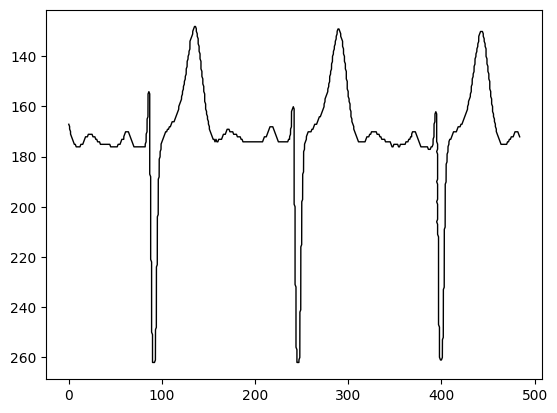

In [ ]:
#import measure
from skimage import measure
import scipy.ndimage as ndimage

#finding contour
contours = measure.find_contours(binary_global,0.9)

# Shows the image with contours found
fig4, ax4 = plt.subplots()

plt.gca().invert_yaxis()

contours_shape = sorted([x.shape for x in contours])[::-1][0:1]
print(contours_shape)
for contour in contours:
  if contour.shape in contours_shape:
    test = resize(contour, (255, 2))
    ax4.plot(contour[:, 1], contour[:, 0],linewidth=1,color='black')
ax1.axis('image')
ax1.set_title("Sample pre-processed Leads 11 image")

In [ ]:
contours_shape = sorted([x.shape for x in contours])[::-1][0:3]
contours_shape

[(1474, 2), (1451, 2), (56, 2)]

In [ ]:
test.shape

(255, 2)

#### **Converting Contour to Dataframe**

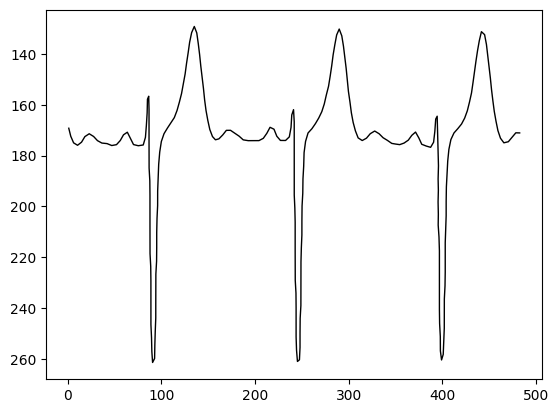

In [ ]:
#converting image to signal

#import pandas
import pandas as pd

#convert contour to dataframe
df = pd.DataFrame(test, columns = ['X','Y'])
fig5, ax5 = plt.subplots()

plt.gca().invert_yaxis()

#plot the image
ax5.plot(df['Y'],df['X'],linewidth=1,color='black',linestyle='solid')

#save the image
fig5.savefig('Lead11_Signal.png')

#### **converting 2D dataframe to CSV**

In [ ]:
#convert to CSV
df.to_csv('data.csv',index=False)

#View CSV data for verification
test_df=pd.read_csv('data.csv')
test_df

,X,Y
0,171.052635,482.577259
1,171.009704,478.462847
2,172.763264,474.473945
3,174.516899,470.477819
4,174.947969,465.719886
...,...,...
250,174.701807,14.836841
251,175.913632,10.592060
252,174.963678,6.382141
253,172.360210,3.330284


#### **Scaling the 2D Data to CSV and Testing**

Data scaling is the process of making sure that all the values in a dataset are within a certain range, such as 0 to 1.

A way to normalize the input features/variables is the Min-Max scaler. By doing so, all features will be transformed into the range [0,1] meaning that the minimum and maximum value of a feature/variable is going to be 0 and 1, respectively.                                                              
  MinMax Scaler Formula                               
   Xscaled=(X - Xmin)/(Xmax - Xmin)

In [ ]:
#scaling the data and testing
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

fit_transform_data = scaler.fit_transform(df)
Normalized_Scaled=pd.DataFrame(fit_transform_data, columns = ['X','Y'])
Normalized_Scaled

,X,Y
0,0.316789,1.000000
1,0.316464,0.991453
2,0.329721,0.983166
3,0.342980,0.974864
4,0.346239,0.964980
...,...,...
250,0.344378,0.028299
251,0.353539,0.019480
252,0.346357,0.010734
253,0.326674,0.004394


**TESTING**

#plotting scaled data (X,Y) to test signal shape

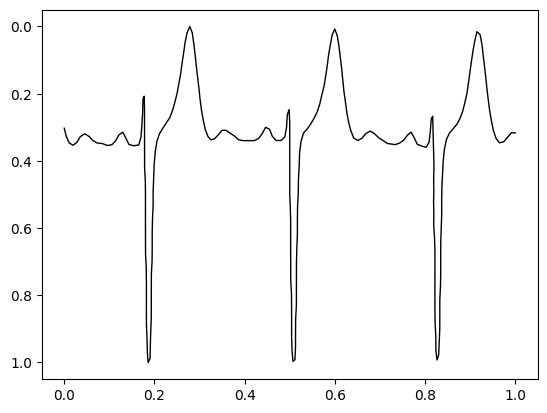

In [ ]:
#plotting scaled data to test signal shape
import pandas as pd

df = pd.DataFrame(Normalized_Scaled, columns = ['X','Y'])

fig6, ax6 = plt.subplots()

plt.gca().invert_yaxis()

ax6.plot(Normalized_Scaled['Y'],Normalized_Scaled['X'],linewidth=1,color='black',linestyle='solid')

#Extracting scaled_data from Test Signal to CSV

In [ ]:
#scaled_data to CSV
Normalized_Scaled.to_csv('scaled_data.csv',index=False)
#reading CSV to test
test_scaled_df=pd.read_csv('scaled_data.csv')
test_scaled_df

,X,Y
0,0.316789,1.000000
1,0.316464,0.991453
2,0.329721,0.983166
3,0.342980,0.974864
4,0.346239,0.964980
...,...,...
250,0.344378,0.028299
251,0.353539,0.019480
252,0.346357,0.010734
253,0.326674,0.004394


##**MODULE-3** : Data extraction/ Feature Extraction (Single ECG Image) which is stored in  scaler_1D csv file.

#For now save the X axis as a seperate csv file (1D) as it corresponds the high and low points and y axis corresponds to curve/shape.

In [ ]:
# For now save the X axis as a seperate csv file (1D) as it seems to corresponds the high and low points and y axis corresponds to curve/shape.
#scaled_data to CSV
Normalized_Scaled['X'].to_csv('scaled_data_X.csv',index=False)
#reading CSV to test
test_scaled_df_X=pd.read_csv('scaled_data_X.csv')
test_scaled_df_X.shape

(255, 1)

#plotting 1D (Column X) signal

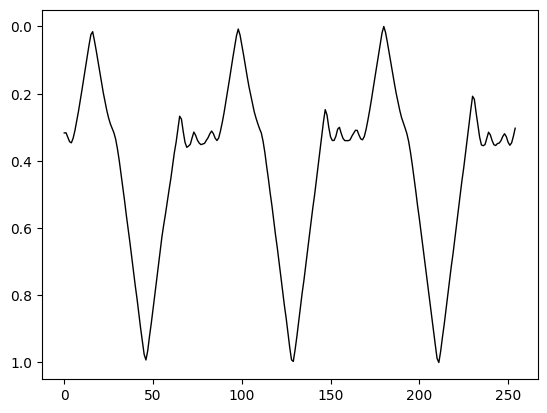

In [ ]:
#plotting 1D signal
#import pandas as pd

test_plot_df = pd.DataFrame(test_scaled_df_X, columns = ['X'])
fig6, ax6 = plt.subplots()

plt.gca().invert_yaxis()

ax6.plot(test_plot_df,linewidth=1,color='black',linestyle='solid')

**Transpose the 1D scaled dataframe**

In [ ]:
#transpose the 1D scaled dataframe
test_transpose = test_scaled_df_X.T
test_transpose

,0,1,2,3,4,5,6,7,8,9,...,245,246,247,248,249,250,251,252,253,254
X,0.316789,0.316464,0.329721,0.34298,0.346239,0.332489,0.30992,0.282096,0.252676,0.220673,...,0.346938,0.339738,0.32736,0.319309,0.327702,0.344378,0.353539,0.346357,0.326674,0.302829


**MODULE-4** : **TOTAL DATA PREPROCESSING/EXTRACTION AND STORED IN SCALER_1D CSV FILE**

#### **FUNCTION TO EXTRACT IMAGE LEADS(1-13) (FEATURE EXTRACTION)**

#### **RUN THE BELOW CELL TO GENERATE THE NECESSARY FILES**

It is a comprehensive script for processing electrocardiogram (ECG) images. Here's a summary of what script does:

**Load Image Data:**

Load images from different folders representing different types of heart conditions (**normal**, **abnormal**, **myocardial** infarction **bold text**, history of MI).

**Image Processing and Feature Extraction:**

For each image, the script:
Divides the image into 13 different leads.
Applies preprocessing steps, such as converting to grayscale, Gaussian smoothing, and Otsu thresholding.
Extracts the signal from each lead.
Plots and saves preprocessed and contour images for visualization.
Converts and scales the signal data to CSV files.

**CSV Conversion and Scaling:**

The script creates CSV files containing the X and Y coordinates of the contours for each lead.
Scales the data using Min-Max scaling.
Saves the scaled data(X VALUE) to CSV files.

**Visualization:**

The script also generates plots for visualization purposes.
Iterate Over Different Heart Types:

The script loops over different heart types and processes images accordingly.

This is a comprehensive script for extracting features from ECG images and preparing data for further analysis or machine learning tasks.

**Import Libraries & load the different types of folders**

In [ ]:
import os
import re
from skimage.filters import threshold_otsu,gaussian
from skimage import measure
import pandas as pd
import numpy as nm
from sklearn.preprocessing import MinMaxScaler
from skimage.io import imread
from skimage import color
from skimage.transform import resize
from numpy import asarray
import matplotlib.pyplot as plt


#load the different types of folders
normal_parent_dir = '/content/drive/MyDrive/MAJOR PROJECT 2024/ARSP Group15-MAJOR PROJECT-DCVD-ECG IMAGES/Normal Person ECG Images (284x12=3408)/'
abnormal_parent_dir = '/content/drive/MyDrive/MAJOR PROJECT 2024/ARSP Group15-MAJOR PROJECT-DCVD-ECG IMAGES/ECG Images of Patient that have abnormal heartbeat (233x12=2796)'
MI_parent_dir = '/content/drive/MyDrive/MAJOR PROJECT 2024/ARSP Group15-MAJOR PROJECT-DCVD-ECG IMAGES/ECG Images of Myocardial Infarction Patients (240x12=2880)'
MI_history_parent_dir = '/content/drive/MyDrive/MAJOR PROJECT 2024/ARSP Group15-MAJOR PROJECT-DCVD-ECG IMAGES/ECG Images of Patient that have History of MI (172x12=2064)'

##DATA PRE-PROCESSING

**Dividing the ECG leads from 1-13 OF IMAGES from the PARENT_FOLDER and loop through leads and create seperate images**

In [ ]:
"""#### **FUNCTION FOR  IMAGE LEADS(1-13) PRE-PROCESSING**"""
def Convert_Image_Lead(image_file,parent_folder):
    #read the image
    image=imread('{parent}/{image_file}'.format(parent=str(parent_folder),image_file=str(image_file)),plugin='matplotlib')
    #dividing the ECG leads from 1-13 from the above image
    Lead_1 = image[300:600, 150:643]
    Lead_2 = image[300:600, 646:1135]
    Lead_3 = image[300:600, 1140:1626]
    Lead_4 = image[300:600, 1630:2125]
    Lead_5 = image[600:900, 150:643]
    Lead_6 = image[600:900, 646:1135]
    Lead_7 = image[600:900, 1140:1626]
    Lead_8 = image[600:900, 1630:2125]
    Lead_9 = image[900:1200, 150:643]
    Lead_10 = image[900:1200, 646:1135]
    Lead_11 = image[900:1200, 1140:1626]
    Lead_12 = image[900:1200, 1630:2125]
    Lead_13 = image[1250:1480, 150:2125]

    #list of leads
    Leads=[Lead_1,Lead_2,Lead_3,Lead_4,Lead_5,Lead_6,Lead_7,Lead_8,Lead_9,Lead_10,Lead_11,Lead_12,Lead_13]

    #folder_name to store lead_images
    folder_name= re.sub('.jpg', '',image_file)

    #loop through leads and create seperate images
    for x,y in enumerate(Leads):
      fig , ax = plt.subplots()
      #fig.set_size_inches(20, 20)
      ax.imshow(y)
      ax.axis('off')
      ax.set_title("Leads {0}".format(x+1))
      if (os.path.exists(parent_folder+'/'+folder_name)):
        pass
      else:
        os.makedirs(parent_folder+'/'+folder_name)

      #save the image
      plt.close('all')
      plt.ioff()
      fig.savefig('{parent}/{folder_name}/Lead_{x}_Signal.png'.format(folder_name=folder_name,x=x+1,parent=parent_folder))

    extract_signal_leads(Leads,folder_name,parent_folder)


Cnverting the devided image leads to Gray scale,                  
          Smoothening the image with gaussian filter,
         thresholding to distinguish foreground and background,
         using otsu thresholding for getting threshold value and save the images as Preprocessed_signal.png.

Extract_only signal contour from Preprocessed images and save it as Contour_Signal.png

In [ ]:

#extract_only signal from images
def extract_signal_leads(Leads,folder_name,parent):
  #looping through image list containg all leads from 1-13
  for x,y in enumerate(Leads):
    #creating subplot
    fig1 , ax1 = plt.subplots()

      #converting to gray scale
    grayscale = color.rgb2gray(y)
    #smoothing image
    blurred_image = gaussian(grayscale,sigma=0.7)
    #thresholding to distinguish foreground and background
    #using otsu thresholding for getting threshold value
    global_thresh = threshold_otsu(blurred_image)

    #creating binary image based on threshold
    binary_global = blurred_image < global_thresh

    #resize image
    if x!=12:
      binary_global = resize(binary_global, (300, 450))

    ax1.imshow(binary_global,cmap="gray")
    ax1.axis('off')
    ax1.set_title("pre-processed Leads {} image".format(x+1))
    plt.close('all')
    plt.ioff()
    #save the image
    fig1.savefig('{parent}/{folder_name}/Lead_{x}_preprocessed_Signal.png'.format(folder_name=folder_name,x=x+1,parent=parent))

    fig7 , ax7 = plt.subplots()
    plt.gca().invert_yaxis()

    #find contour and get only the necessary signal contour
    contours = measure.find_contours(binary_global,0.8)
    contours_shape = sorted([x.shape for x in contours])[::-1][0:1]
    for contour in contours:
      if contour.shape in contours_shape:
        test = resize(contour, (255, 2))
        ax7.plot(test[:, 1], test[:, 0],linewidth=1,color='black')
    ax7.axis('image')
    ax7.set_title("Contour {} image".format(x+1))
    plt.close('all')
    plt.ioff()
    #save the image
    fig7.savefig('{parent}/{folder_name}/Lead_{x}_Contour_Signal.png'.format(folder_name=folder_name,x=x+1,parent=parent))
    lead_no=x
    #convert_csv(test,lead_no,folder_name,parent)
    #scale_csv(test,lead_no,folder_name,parent)
    scale_csv_1D(test,lead_no,folder_name,parent)


##DATA EXTRACTIIOON

**Convert Contour to 2D dataframe ('X','Y')**

In [ ]:
def convert_csv(test,lead_no,folder_name,parent):
#convert contour to dataframe
  target=folder_name[0:2]
  df = pd.DataFrame(test, columns = ['X','Y'])
  df['Target']=target
  #x_axis= 'Lead_{lead_no}_X'.format(lead_no=lead_no)
  #y_axis= 'Lead_{lead_no}_Y'.format(lead_no=lead_no)
  fig5, ax5 = plt.subplots()
  #convert to CSV
  df.to_csv('{parent}/{folder_name}/{lead_no}.csv'.format(lead_no=lead_no+1,parent=parent,folder_name=folder_name),index=False)

**Scaling the 2D data ('X','Y') with MinMax Scaler and testing**

In [ ]:
def scale_csv(test,lead_no,folder_name,parent):
  #scaling the data and testing
  target=folder_name[0:2]
  scaler = MinMaxScaler()
  fit_transform_data = scaler.fit_transform(test)
  Normalized_Scaled=pd.DataFrame(fit_transform_data, columns = ['X','Y'])
  Normalized_Scaled=Normalized_Scaled.T
  Normalized_Scaled['Target']=target
  #scaled_data to CSV
  if (os.path.isfile('{parent}/Scaled_{lead_no}.csv'.format(lead_no=lead_no+1,parent=parent))):
    Normalized_Scaled.to_csv('{parent}/Scaled_{lead_no}.csv'.format(lead_no=lead_no+1,parent=parent), mode='a', header=False,index=False)
  else:
    Normalized_Scaled.to_csv('{parent}/Scaled_{lead_no}.csv'.format(lead_no=lead_no+1,parent=parent,folder_name=folder_name),index=False)

##DATA STORING IN CSV FILES

**Scaled_1D data to CSV & loop through folder/files and create seperate images of different leads**

In [ ]:
def scale_csv_1D(test,lead_no,folder_name,parent):
  target=folder_name[0:2]
  #scaling the data and testing
  scaler = MinMaxScaler()
  fit_transform_data = scaler.fit_transform(test)
  Normalized_Scaled=pd.DataFrame(fit_transform_data[:,0], columns = ['X'])
  fig6, ax6 = plt.subplots()
  plt.gca().invert_yaxis()
  ax6.plot(Normalized_Scaled,linewidth=1,color='black',linestyle='solid')
  plt.close('all')
  plt.ioff()
  fig6.savefig('{parent}/{folder_name}/ID_Lead_{lead_no}_Signal.png'.format(folder_name=folder_name,lead_no=lead_no+1,parent=parent))
  Normalized_Scaled=Normalized_Scaled.T
  Normalized_Scaled['Target']=target
  #scaled_data to CSV
  if (os.path.isfile('{parent}/scaled_data_1D_{lead_no}.csv'.format(lead_no=lead_no+1,parent=parent))):
    Normalized_Scaled.to_csv('{parent}/scaled_data_1D_{lead_no}.csv'.format(lead_no=lead_no+1,parent=parent), mode='a', header=False,index=False)
  else:
    Normalized_Scaled.to_csv('{parent}/scaled_data_1D_{lead_no}.csv'.format(lead_no=lead_no+1,parent=parent,folder_name=folder_name),index=False)

#load the different types of folders
normal_parent_dir = '/content/drive/MyDrive/MAJOR PROJECT 2024/ARSP Group15-MAJOR PROJECT-DCVD-ECG IMAGES/Normal Person ECG Images (284x12=3408)/'
abnormal_parent_dir = '/content/drive/MyDrive/MAJOR PROJECT 2024/ARSP Group15-MAJOR PROJECT-DCVD-ECG IMAGES/ECG Images of Patient that have abnormal heartbeat (233x12=2796)'
MI_parent_dir = '/content/drive/MyDrive/MAJOR PROJECT 2024/ARSP Group15-MAJOR PROJECT-DCVD-ECG IMAGES/ECG Images of Myocardial Infarction Patients (240x12=2880)'
MI_history_parent_dir = '/content/drive/MyDrive/MAJOR PROJECT 2024/ARSP Group15-MAJOR PROJECT-DCVD-ECG IMAGES/ECG Images of Patient that have History of MI (172x12=2064)'

Types_ECG = {'Abnormal_hear_beat':abnormal_parent_dir,'MI':MI_parent_dir,'History_MI':MI_history_parent_dir,'Normal':normal_parent_dir}

#### parse all the files in the different folders and peform all the above steps as mentioned in the analysis Sample.

#loop through folder/files and create seperate images of different leads
for types, folder in Types_ECG.items():
    try:
        for files in os.listdir(folder):
            if files.endswith(".jpg"):
                file_path = os.path.join(folder, files)
                with open(file_path, 'r') as f:
                    Convert_Image_Lead(files, folder)
    except FileNotFoundError as e:
        print(f"Error: {e}")

### **NOW WE HAVE BOTH CSV FILES AND CROPPED LEAD IMAGES(1-13) TO WORK ON. WE CAN PERFROM CNN on 1D & 2D images and perform different Supervised classification algorithms based on CSV DATA(KNN, LOGISTIC REGRESSION, SVM etc.**